In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
import mlflow

# Import custom functions from src folder
import sys
sys.path.append('../scripts')  # Add src folder to Python path
from data_preprocessing import (
    handle_missing_values,
    clean_data,
    perform_eda,
    merge_geolocation_data,
    feature_engineering,
    normalize_data,
    encode_categorical_features,
)
from model_training import (
    prepare_data,
    select_model,
    train_and_evaluate,
    log_experiment,
)

# Load datasets
fraud_data = pd.read_csv('../data/Fraud_Data.csv')
ip_country_data = pd.read_csv('../data/IpAddress_to_Country.csv')
creditcard_data = pd.read_csv('../data/creditcard.csv')

# Display dataset summaries
print("Fraud Data Summary:")
print(fraud_data.info())
print("\nIP Country Data Summary:")
print(ip_country_data.info())
print("\nCredit Card Data Summary:")
print(creditcard_data.info())

Fraud Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB
None

IP Country Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------  

In [7]:
# Task 1: Data Analysis and Preprocessing
# 1. Handle Missing Values
faud_data = handle_missing_values(fraud_data, strategy='drop')
creditcard_data = handle_missing_values(creditcard_data, strategy='drop')

In [8]:
# 2. Data Cleaning
fraud_data = clean_data(fraud_data)
creditcard_data = clean_data(creditcard_data)


Fraud Data EDA:
             user_id                    signup_time  \
count  151112.000000                         151112   
mean   200171.040970  2015-04-20 00:56:09.511329280   
min         2.000000            2015-01-01 00:00:42   
25%    100642.500000     2015-02-18 09:52:48.500000   
50%    199958.000000            2015-04-19 04:41:30   
75%    300054.000000  2015-06-18 14:47:22.750000128   
max    400000.000000            2015-08-18 04:40:29   
std    115369.285024                            NaN   

                       purchase_time  purchase_value            age  \
count                         151112   151112.000000  151112.000000   
mean   2015-06-16 02:56:38.759952896       36.935372      33.140704   
min              2015-01-01 00:00:44        9.000000      18.000000   
25%       2015-04-18 14:41:25.500000       22.000000      27.000000   
50%       2015-06-18 13:46:17.500000       35.000000      33.000000   
75%       2015-08-17 18:48:31.500000       49.000000      39.0

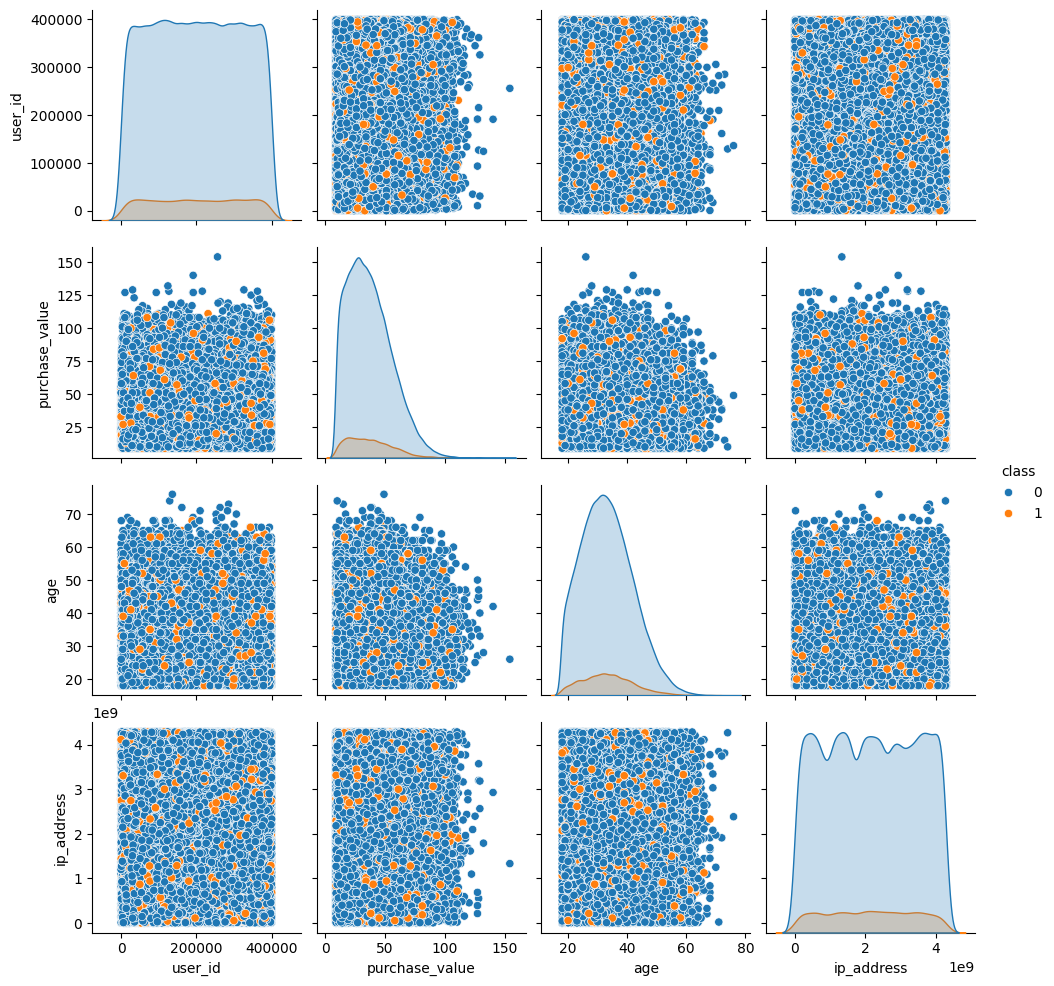

In [12]:
# 3. Exploratory Data Analysis (EDA)
print("Fraud Data EDA:")
perform_eda(fraud_data)
print("\nCredit Card Data EDA:")
# perform_eda(creditcard_data)


In [11]:
print(creditcard_data.columns)


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [ ]:
# 4. Merge Datasets for Geolocation Analysis
merged_fraud_data = merge_geolocation_data(fraud_data, ip_country_data)

# 5. Feature Engineering
merged_fraud_data = feature_engineering(merged_fraud_data)
creditcard_data = feature_engineering(
    creditcard_data
)  # Add time-based features if needed


In [14]:
# 6. Normalization and Scaling
numerical_features = [
    "purchase_value",
    "age",
    "transaction_frequency",
    "transaction_velocity",
]
merged_fraud_data = normalize_data(merged_fraud_data, numerical_features)

# 7. Encode Categorical Features
categorical_features = ["source", "browser", "sex"]
merged_fraud_data = encode_categorical_features(merged_fraud_data, categorical_features)


NameError: name 'merged_fraud_data' is not defined

In [ ]:
# Task 2: Model Building and Training

# 1. Data Preparation
X_train_fraud, X_test_fraud, y_train_fraud, y_test_fraud = prepare_data(
    merged_fraud_data, target_column="class"
)
X_train_credit, X_test_credit, y_train_credit, y_test_credit = prepare_data(
    creditcard_data, target_column="Class"
)

# 2. Model Selection
models = [
    "LogisticRegression",
    "DecisionTree",
    "RandomForest",
    "GradientBoosting",
    "MLP",
]

for model_name in models:
    print(f"\nTraining {model_name} on Fraud Data:")
    model = select_model(model_name)
    train_and_evaluate(model, X_train_fraud, y_train_fraud, X_test_fraud, y_test_fraud)

    print(f"\nTraining {model_name} on Credit Card Data:")
    model = select_model(model_name)
    train_and_evaluate(
        model, X_train_credit, y_train_credit, X_test_credit, y_test_credit
    )


In [ ]:
# 3. Log Experiments with MLflow
params = {"model": "RandomForest", "dataset": "Fraud Data"}
metrics = {"roc_auc": roc_auc_score(y_test_fraud, model.predict(X_test_fraud))}
log_experiment(model, params, metrics)
